Requirements: you will need to install [magpy](https://github.com/geomagpy/magpy) to run the following examples

        pip install geomagpy

Leonhardt, R., Bailey, R., Schovanec, H., Fee, J., Bracke, S., Miklavec, M., & Kompein, N. (2025). MagPy – Analyzing and displaying geomagnetic data (Version 2.0.0) [Computer software]. https://doi.org/10.5281/zenodo.15861613

In [1]:
from magpy.stream import *
from magpy.core import plot as mp
matplotlib.use('TkAgg')
%matplotlib widget

# 1.0 Reading data from the INTERMAGNET Webservice (supported by EPOS)

An important webservice is the [INTERMAGNET webservice](https://imag-data.bgs.ac.uk/GIN/) hosted at the British 
Geological Survey (BGS). Below you will find a  typical example of an access using several available options. With the following command you can directly access this webservice also provided by EPOS. You might want to change the Observatory code and time range. Please checkout [magpy read instructions](https://github.com/geomagpy/magpy/tree/master?tab=readme-ov-file#339-reading-data-from-the-intermagnet-webservice) for further comments.

In [2]:
data = read('https://imag-data-staging.bgs.ac.uk/GIN_V1/GINServices?request=GetData&observatoryIagaCode=HER&dataStartDate=2024-05-08T00:00:00Z&dataEndDate=2024-05-13T23:59:59Z&Format=iaga2002&elements=&publicationState=adj-or-rep&samplesPerDay=minute')

## 1.1 Plotting data 

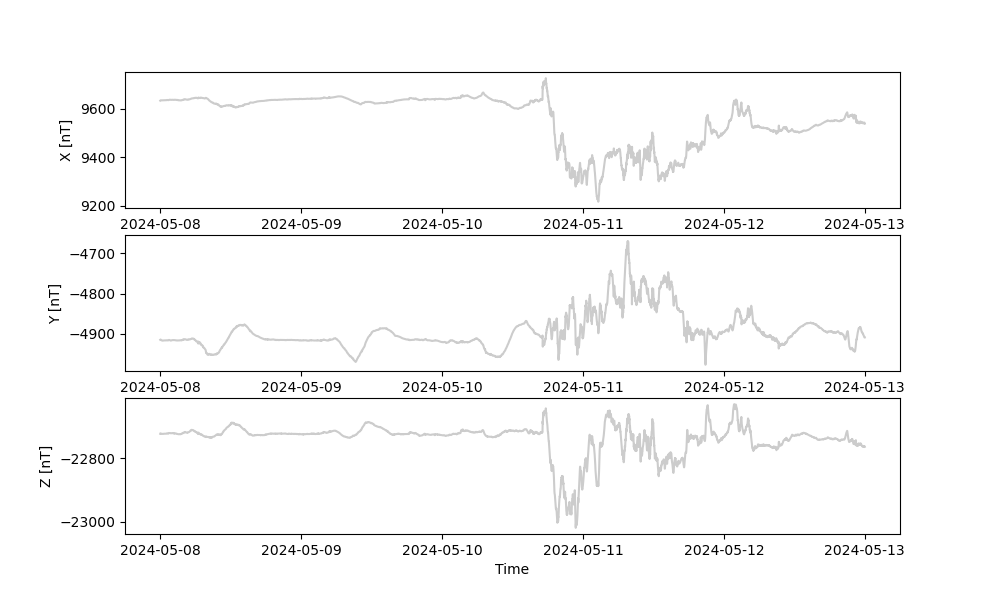

In [3]:
p,a = mp.tsplot(data, height=2)

# 2.0 Reading geomagnetic event data from the EPOS data portal

Download evenet data on SC, as provided from Ebro observatory, on the EPOS portal. *Instructions to be added.* When data has been downloaded provide the path to this data file.

In [4]:
events = read('./examples/SC_2024_P.dat')

In [5]:
events.stats()

{'SensorID': 'SC_2_0001',
 'Variables': ['x', 'y', 'z', 'f'],
 'Amount': 33,
 'Samplingperiod (sec)': 427830.0,
 'StationID': 'SC',
 'DataID': 'SC_2_0001_0001',
 'DataComponents': 'XYZF',
 'Starttime': datetime.datetime(2024, 1, 3, 5, 36),
 'Endtime': datetime.datetime(2024, 10, 28, 4, 47)}

## 2.1 Convert event time series information into flags

In [6]:
from magpy.core import flagging
sscflags = flagging.convert_to_flags(events, flagtype=3, labelid='020', sensorid=data.header.get("SensorID"), keystoflag=["x","y","z"], commentkeys="y", groups="geomagnetism")
 

## 2.2 Extracting and displaying relevant SSCs

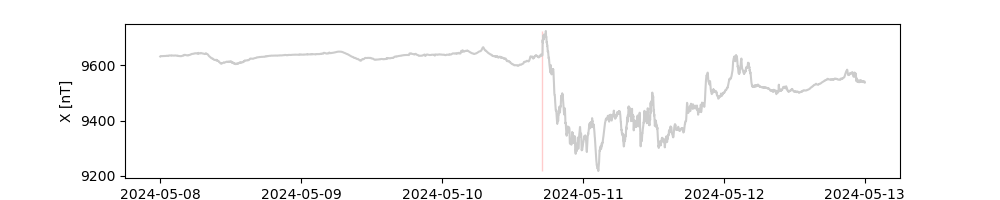

In [7]:
sscflags = sscflags.trim(starttime=data.start(), endtime=data.end())
p = sscflags.create_patch(data)
fig, ax = mp.tsplot(data, ['x'], patch=p, height=2)

# 3.0 Adding inidices data (currently from GFZ Potsdam)


In [8]:
kp = read('https://kp.gfz-potsdam.de/app/json/?start=2024-05-08T00:00:00Z&end=2024-05-12T23:59:59Z&index=Kp')

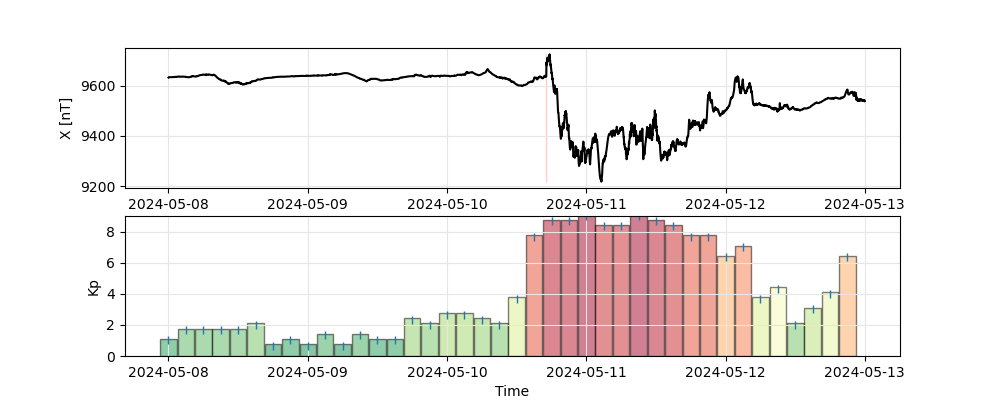

In [9]:
fig, ax = mp.tsplot([data,kp], [['x'],['var1']], symbols=[['-'],["k"]], colors=[['black'],['r']], patch=p, grid=True,  height=2)

In [15]:
#am = read("http://isgi.unistra.fr/ws?user=epos693&index=am&StartTime=2024-05-01&EndTime=2024-05-31")
am = read('./examples/am*', debug=True)

Found a file pathname: ./examples/am*
Extracted dates from filename: [datetime.date(2015, 8, 31)]
_read: Testing format: IAGA ...
      -- found: IAGA


In [16]:
am

[]